<a href="https://colab.research.google.com/github/BDesormes/Data-Sci/blob/main/Desormes_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

imported the functions we will be using as nicknames for easier use to find our data

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

define GPU data to return torch.tensor data

deine the plot(x) to use a cmap of gray and manipulated the size in inches

inserted get_google_slides to enter in our google slides by using url

inserted google_slides to give r a value of requests to answer true, we also insert "open" to open our slideshow and display images

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

inserted labels from the url provided and set the model weights = to default


In [ ]:
url = "https://docs.google.com/presentation/d/1ZH1emYJatasGvaxAlPUYyq82deKUAdnM4AmnDzjaDUA/edit#slide=id.g1a97f27c84d_0_124"

inserted url to my slideshow to use to find data

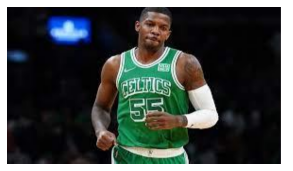

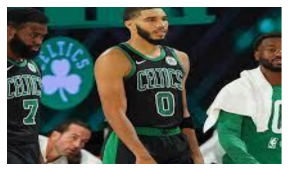

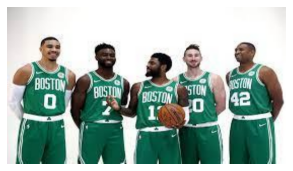

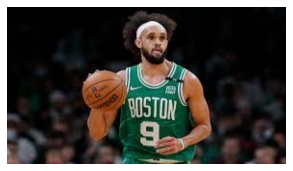

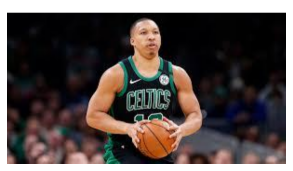

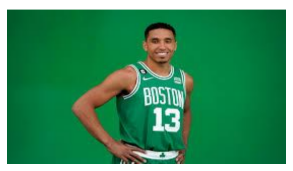

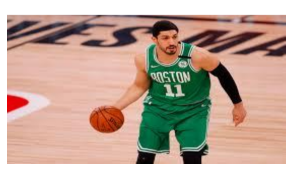

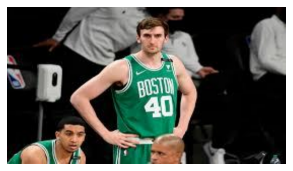

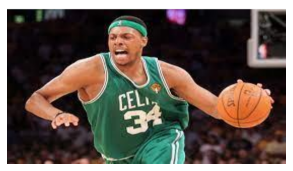

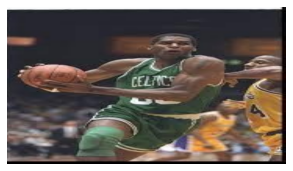

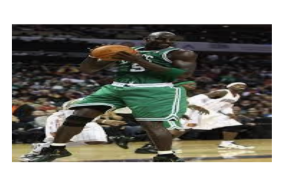

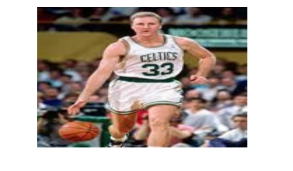

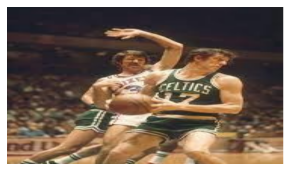

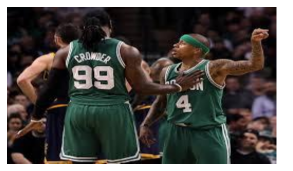

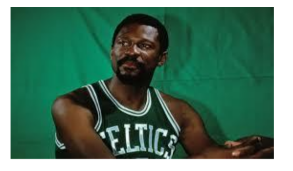

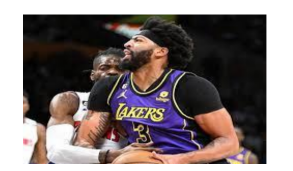

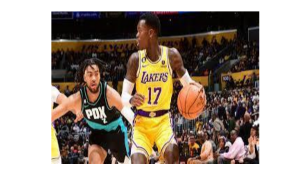

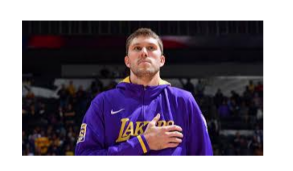

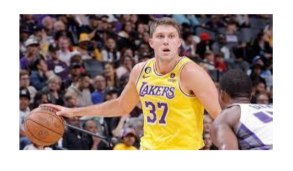

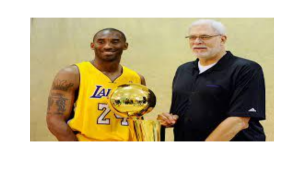

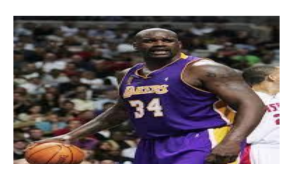

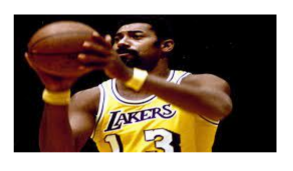

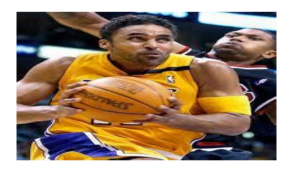

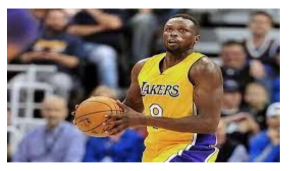

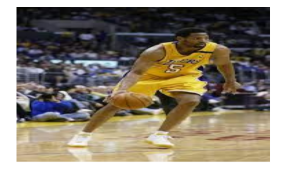

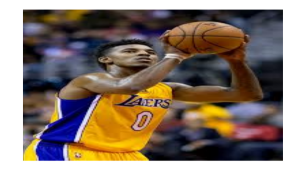

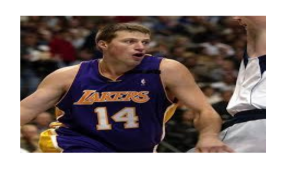

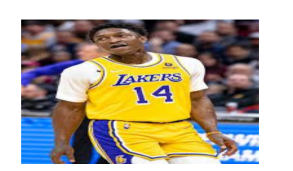

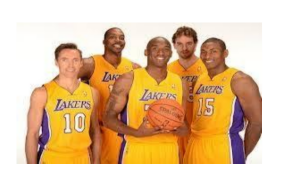

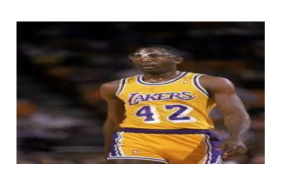

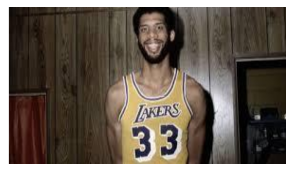

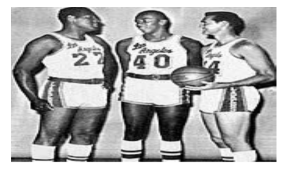

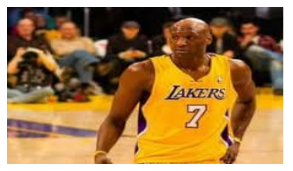

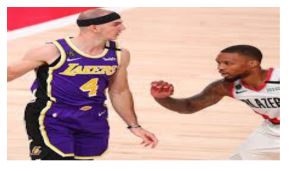

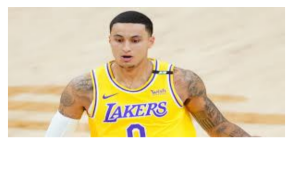

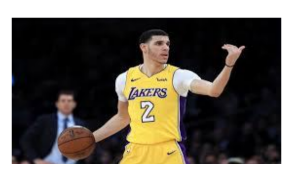

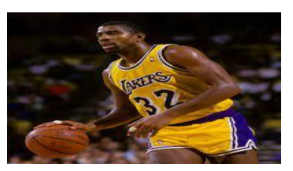

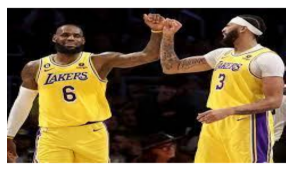

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

inserted ifor images to portray our slides by using get_slides(url)

then inserted plot(image) 

then used images = torch.vstack(images) to stack the images

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

found the shape of the images

In [ ]:
model(images)

tensor([[ 2.5458,  1.9143, -1.3774,  ..., -3.5046,  2.9617,  2.9290],
        [-1.5559, -1.2248, -0.1220,  ..., -3.4325,  1.2554,  1.4134],
        [ 0.1234,  0.9835, -1.6844,  ..., -2.4186,  1.7815,  1.8494],
        ...,
        [-0.3809, -1.5264, -1.2367,  ..., -1.6951,  3.8574,  0.9747],
        [-0.0478,  1.1743,  0.1650,  ...,  0.5771,  2.2904,  0.2220],
        [-3.4385, -3.4248, -1.3468,  ..., -1.2999,  2.7621, -1.6234]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

used model to create a array of data of our images

In [ ]:
y = model(images)

set y = to the model images

In [ ]:
y.shape

torch.Size([50, 1000])

found the torch size of y

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

set guesses  equal to the torch argmax

In [ ]:
for i in list(guesses):
    print(labels[i])

racket, racquet
basketball
basketball
basketball
milk can
racket, racquet
basketball
basketball
basketball
jersey, T-shirt, tee shirt
basketball
parallel bars, bars
basketball
Petri dish
basketball
potter's wheel
volleyball
potter's wheel
volleyball
basketball
basketball
basketball
basketball
steel drum
basketball
basketball
basketball
ping-pong ball
academic gown, academic robe, judge's robe
parallel bars, bars
academic gown, academic robe, judge's robe
basketball
basketball
paddle, boat paddle
basketball
basketball
basketball
ping-pong ball
balance beam, beam
basketball
sarong
basketball
neck brace
maillot, tank suit
volleyball
maillot, tank suit
maraca
basketball
basketball
volleyball


for i in the list of guesses we print the labels as random guesses of what they are

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

set Y = numpy zeros from(50,)
then Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

printed the array of y

In [ ]:
X = y.detach().cpu().numpy() 

set X equal to the y.detach . cpu .numpy

In [ ]:
X.shape

(50, 1000)

found the shaope of the X equation we made in cell 14

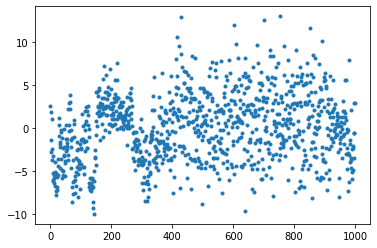

In [ ]:
plt.plot(X[0],'.')

plotted the data of X 

In [ ]:
X[0]

array([ 2.54578018e+00,  1.91432095e+00, -1.37736154e+00, -2.76682162e+00,
        1.09554052e+00, -2.37249136e+00, -3.67823815e+00, -3.23870993e+00,
       -6.12667465e+00, -5.16208124e+00, -5.95485115e+00, -6.38084555e+00,
       -5.44630098e+00, -5.81893253e+00, -5.09869719e+00, -6.70890903e+00,
       -3.87633562e+00, -5.24611378e+00, -7.69175196e+00, -7.27678680e+00,
       -6.79040909e+00, -5.67634392e+00, -7.17708206e+00, -5.51426888e+00,
       -3.59195280e+00, -5.46976185e+00, -4.36319733e+00,  1.17910838e+00,
       -9.45640564e-01,  3.38417292e-01, -4.64132214e+00, -1.84388304e+00,
       -1.62080503e+00, -2.14071727e+00, -2.11079657e-01, -3.51545525e+00,
       -4.50695932e-01, -4.87914228e+00, -1.13458836e+00, -5.73046684e+00,
       -5.43752670e+00, -2.34793568e+00, -4.97521973e+00, -2.15812278e+00,
       -3.23540640e+00, -6.00809455e-02, -3.15082550e+00, -3.82957029e+00,
       -5.49187183e+00, -4.06396961e+00, -1.30009341e+00, -2.62739277e+00,
        3.63144457e-01, -

printed the data X's data

In [ ]:
np.argmax(X[0])

752

found the argmax of X's data

In [ ]:
labels[948]

'Granny Smith'

printed label 948

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

created a equation for the top ten argsort guesses of the labels

In [ ]:
for i in top_ten:
    print(labels[i])

racket, racquet
basketball
parallel bars, bars
horizontal bar, high bar
tennis ball
balance beam, beam
volleyball
jersey, T-shirt, tee shirt
neck brace
barbell


printed trhe top ten guesses of the labels

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

printed all labels and variations

(array([ 15.,  78., 147., 188., 214., 198., 103.,  41.,  11.,   5.]),
 array([-9.93343   , -7.6425753 , -5.351721  , -3.0608666 , -0.77001226,
         1.5208421 ,  3.8116965 ,  6.102551  ,  8.393405  , 10.684259  ,
        12.975114  ], dtype=float32),
 <a list of 10 Patch objects>)

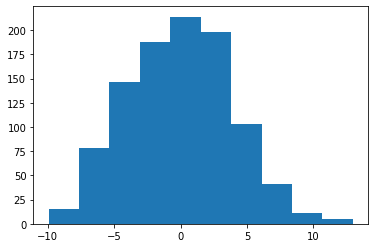

In [ ]:
plt.hist(X[0])

plotted a histogram to compare the guesses and occurences of data

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

set X equal to the GPU data of X
set Y equal to the GPU data of Y

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

define softmax as s1 equal to the exponetial value of the torch data
set s = to the s1 divided by the s1 sum

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

define cross entropy as outputs and labels 

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

defined radn_trunc to:

set mu to 0

sigma to 0.1

R equal to stats.truncnorm times a the equations

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

set u1 to torchrand and the size by 1 - np.exp(-2) + np.exp(-2)

set u2 = torch.rand(size)

z = torch.sqrt(-2*torch,log(u1)) * torch.cos(2*np.pi*u2)
 

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

created a dataset to return the sum of the torch max

In [ ]:
X.shape

torch.Size([50, 1000])

found the shape of X

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

defiend the batch mode to return x,y set
 
 the if is "train"

the elif is "test"

In [ ]:
def model(x,w):

    return x@w[0]

the model(x,w) is returned as x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

we create a make_plots to show acc_train to reflect the model(x,w),y)

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


we create a dataset to run a test of our data of labels and images to show the loss and how accurately our test runs can get to the actual data

the best run was gallant-elevator-2

the worst run was youtful-wood-4

the average run was blooming-leaf-1


https://tensorspace.org/